# Kirchner Model 

This is an example Python code for the Kirchner Model. You can use this as a reference when you develop your own model

In this implementation we do not derive $\alpha$ and $\beta$ from the data, but instead manually asign their values. 

What is your alpha value?0.011
What is your beta value?1.1


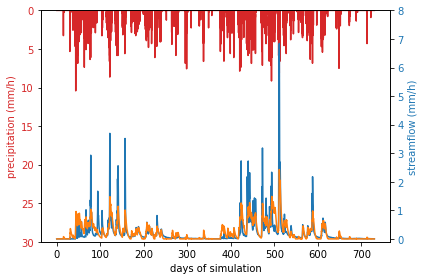

In [6]:
# load some packages

import numpy as np
import csv
import array as arr
import matplotlib.pyplot as plt

#from __future__ import print_function
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets

# Set the parameter values alpha and beta 
# In this example we fix delta t to be 1 hours

alpha = float(input("What is your alpha value?"))
beta  = float(input("What is your beta value?"))

#def f(alpha):
#    return alpha
#interact(f, alpha=widgets.FloatSlider(min=0, max=0.2, step=0.0001, value=0.01));


#alpha = f.result 

#def f(beta):
#    return beta
#interact(f, beta=widgets.FloatSlider(min=0, max=4, step=0.01, value=2));

#beta = f.result 

#def f(alpha):
#    return x
#interact(f, beta=widgets.IntSlider(min=0, max=5, step=0.01, value=1));

# From hereon the code goes automatically 

delta_t = 1       # do not change



# Load the data

E = np.zeros(17522)
Q = np.zeros(17522)
P = np.zeros(17522)
Qm = np.zeros(17522)

with open('random_catchment.txt', 'r') as file:
    reader = csv.reader(file)
    i = 1
    for row in reader:
        #print(row[2])
        Q[i] = float(row[1])
        P[i] = float(row[2])
        E[i] = float(row[3])
        i = i+1
        
# Run the model
n = len(Q)         # Checks for how many timesteps there is data
Qm[1] = Q[1]       # Initializes the first modeled streamflow value to equal the observation

for i in range(1,n-1):   # Loops t
    Qm[i+1] = max(0.001,Qm[i] + delta_t * alpha * (Qm[i]**(beta - 1) * (P[i] - E[i] - Qm[i])))
    i = i+1    # update counter

# Make a figure to display the data 

x = np.linspace(0,730, num=n)

#plt.plot(E)
#subplot[s]
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_ylabel('precip (s)')
ax1.set_ylabel('precipitation (mm/h)', color=color)
ax1.set_xlabel('days of simulation')
ax1.plot(x, P, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([30, 0])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color1 = 'tab:blue'
color2 = 'tab:orange'
ax2.set_ylabel('streamflow (mm/h)', color=color1)  # we already handled the x-label with ax1
ax2.plot(x, Q, color=color1)
ax2.plot(x, Qm, color=color2)
ax2.tick_params(axis='y', labelcolor=color1)
#plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.set_ylim([-0.1 , 8])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
